In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [24]:
def make_system(alpha, beta, gamma, delta):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(x=1, y=1)

    t0 = 0
    t_end = 200

    return System(init=init, t0=t0, t_end=t_end, alpha=alpha, beta=beta, gamma=gamma, delta=delta)

In [25]:
def update_func(state, t, system):
    """Update the Lotka-Volterra model.
    
    state: State (X, Y)
    t: time
    system: System object
    
    returns: State (XY)
    """
    
    x = state.x
    y = state.y
    
    x_flow_in = system.alpha * x
    x_flow_death = system.beta * x * y
    
    y_flow_in = system.delta * x * y
    y_flow_death = system.gamma * y
    
    x += x_flow_in - x_flow_death
    y += y_flow_in - y_flow_death
    
    return State(x=x, y=y)

In [26]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

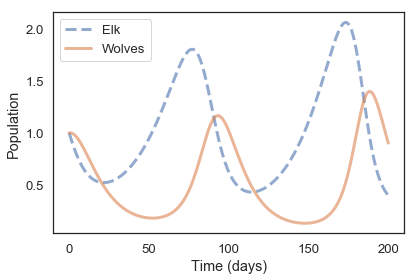

In [27]:
def plot_results(x, y):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(x, '--', label='Elk')
    plot(y, '-', label='Wolves')
    decorate()
    decorate(xlabel='Time (days)',
             ylabel='Population')

system = make_system(0.05, 0.1, 0.1, 0.1)
results = run_simulation(system, update_func)
results.head()
plot_results(results.x, results.y)